In [1]:
import davidstools as my
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression

COVID_DATA = pd.read_csv('./data/super_covid_data.csv')
DEATH_DATA = pd.read_csv('./data/covid_deaths_usafacts.csv')
CASE_DATA = pd.read_csv('./data/covid_confirmed_usafacts.csv')
POPULATION = pd.read_csv('./data/covid_county_population_usafacts.csv')
META_COLUMNS = ['countyFIPS', 'County Name', 'State', 'StateFIPS']

data = [CASE_DATA, DEATH_DATA]
texas = []

for frame in data:
    subframe = my.extract_state_data('TX', frame)
    texas.append(my.select_dates(subframe, '2020-06-01', '2021-01-03'))

,countyFIPS,County Name,State,StateFIPS,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,...,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03
0,48201,Harris County,TX,48,0.000075,0.000077,0.000078,0.000080,0.000081,0.000083,...,0.000762,0.000766,0.000770,0.000774,0.000778,0.000784,0.000789,0.000796,0.000802,0.000808
1,48113,Dallas County,TX,48,0.000104,0.000106,0.000107,0.000108,0.000109,0.000111,...,0.000842,0.000852,0.000863,0.000875,0.000891,0.000905,0.000918,0.000928,0.000938,0.000950
2,48141,El Paso County,TX,48,0.000111,0.000111,0.000114,0.000114,0.000118,0.000122,...,0.002458,0.002465,0.002480,0.002488,0.002496,0.002505,0.002517,0.002523,0.002531,0.002545
3,48029,Bexar County,TX,48,0.000040,0.000041,0.000041,0.000042,0.000043,0.000043,...,0.000938,0.000944,0.000952,0.000961,0.000970,0.000980,0.000987,0.000996,0.001006,0.001019
4,48215,Hidalgo County,TX,48,0.000009,0.000009,0.000009,0.000009,0.000010,0.000010,...,0.002282,0.002290,0.002293,0.002300,0.002303,0.002309,0.002320,0.002323,0.002326,0.002332


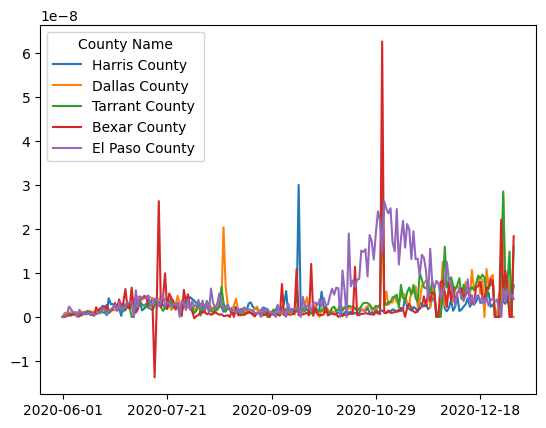

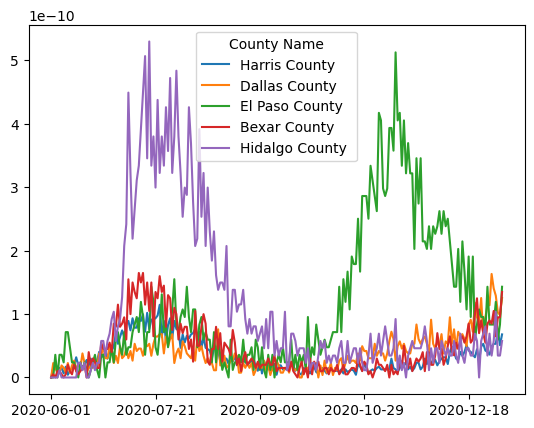

In [5]:
texas_5 = []

for frame in texas:
    subframe = my.top_5(frame, '2021-01-03')
    texas_5.append(subframe)

texas_5_change = []

for frame in texas_5:
    subframe = my.correct_numbers(frame)
    texas_5_change.append(subframe)


#'''
for frame in texas_5_change:
    normFrame = my.normalize_pop(frame, POPULATION, 100000)
    transpose = normFrame.drop(columns=['countyFIPS','State', 'StateFIPS']).set_index('County Name').T  
    transpose.plot(kind='line')
#'''

my.normalize_pop(texas_5[1], POPULATION, 1)
